In [9]:
import pandas as pd
from itertools import combinations
import math
import numpy as np
import statistics
from itertools import permutations
from bioinfokit import analys, visuz
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint
from matplotlib_venn import venn2
import copy
import random
from vst_function import *
from stattools.resampling import PermutationTest

In [60]:
#Africa
africa = pd.read_csv('../data/rawcounts_africa.csv').drop(columns=['Name', 'Description'])
africa = africa.T
africa['region'] = 'Africa'

#America
america = pd.read_csv('../data/rawcounts_america.csv').drop(columns=['Name', 'Description'])
america = america.T
america['region'] = 'America'

#Central Asia
centralasia = pd.read_csv('../data/rawcounts_centralasia.csv').drop(columns=['Name', 'Description'])
centralasia = centralasia.T
centralasia['region'] = 'CentralAsia'

#East Asia
eastasia = pd.read_csv('../data/rawcounts_eastasia.csv').drop(columns=['Name', 'Description'])
eastasia = eastasia.T
eastasia['region'] = 'EastAsia'

#SouthAsia
southasia = pd.read_csv('../data/rawcounts_southasia.csv').drop(columns=['Name', 'Description'])
southasia = southasia.T
southasia['region'] = 'SouthAsia'

#Gene anotation
genes = pd.read_csv('../data/rawcounts_africa.csv')
genes = genes.iloc[:,1:2]

In [61]:
genes

,Description
0,DDX11L1
1,WASH7P
2,MIR6859-1
3,MIR1302-2HG
4,MIR1302-2
...,...
58098,ERCC-00164
58099,ERCC-00165
58100,ERCC-00168
58101,ERCC-00170


In [62]:
d= pd.read_csv("vst_574_candidates_gene_anotation.csv")
d.sort_values(by=['chr','start'])

,chr,start,end,genes,WestEurasia.SouthAsia,WestEurasia.Africa,WestEurasia.CentralAsiaSiberia,WestEurasia.Oceania,WestEurasia.America,WestEurasia.EastAsia,...,Africa.CentralAsiaSiberia,Africa.Oceania,Africa.America,Africa.EastAsia,CentralAsiaSiberia.Oceania,CentralAsiaSiberia.America,CentralAsiaSiberia.EastAsia,Oceania.America,Oceania.EastAsia,America.EastAsia
26,1,9845436,9863387,CLSTN1,0.0,0.0,0.00000,0.00000,0.26365,0.00000,...,0.00000,0.00000,0.32252,0.00000,0.00000,0.00000,0.0,0.21695,0.00000,0.00000
3,1,13725296,13733660,PRAMEF20,0.0,0.0,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.23619,0.23093,0.00000,0.35185,0.34632,0.0,0.00000,0.00000,0.00000
21,1,62112538,62120128,MGC34796,0.0,0.0,0.00000,0.00000,0.23412,0.00000,...,0.00000,0.00000,0.39356,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000
22,1,62620869,62625863,PATJ,0.0,0.0,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.35096,0.00000,0.00000,0.00000,0.0,0.35439,0.00000,0.35764
23,1,62642084,62656768,PATJ,0.0,0.0,0.33042,0.44138,0.31196,0.23015,...,0.35576,0.46692,0.34804,0.22823,0.00000,0.00000,0.0,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,X,134841737,134900920,"CT45A3, CT45A1, CT45A2",0.0,0.0,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.20514,0.00000,0.48622,0.00000,0.0,0.57023,0.00000,0.20363
245,X,134841737,134975246,"CT45A3, CT45A5, CT45A6, CT45A1, CT45A2",0.0,0.0,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.26678,0.00000,0.0,0.35572,0.00000,0.00000
246,X,146360192,146369374,"MIR514A1, MIR514A2",0.0,0.0,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.34919,0.00000,0.00000
247,X,154788811,154840186,TMLHE,0.0,0.0,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.30299,0.00000,0.0,0.24022,0.25329,0.00000


In [63]:
d = d.set_index(['genes'])
d

,chr,start,end,WestEurasia.SouthAsia,WestEurasia.Africa,WestEurasia.CentralAsiaSiberia,WestEurasia.Oceania,WestEurasia.America,WestEurasia.EastAsia,SouthAsia.Africa,...,Africa.CentralAsiaSiberia,Africa.Oceania,Africa.America,Africa.EastAsia,CentralAsiaSiberia.Oceania,CentralAsiaSiberia.America,CentralAsiaSiberia.EastAsia,Oceania.America,Oceania.EastAsia,America.EastAsia
genes,,,,,,,,,,,,,,,,,,,,,
SLC25A24,1,108729310,108737787,0.0,0.00000,0.0,0.00000,0.0,0.0,0.34330,...,0.0000,0.28019,0.50669,0.25098,0.00000,0.25789,0.0,0.00000,0.00000,0.00000
WDR47,1,109573089,109580939,0.0,0.00000,0.0,0.00000,0.0,0.0,0.00000,...,0.0000,0.00000,0.21935,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000
"GSTM1, GSTM2, GSTM5",1,110215300,110257943,0.0,0.00000,0.0,0.00000,0.0,0.0,0.00000,...,0.0000,0.22606,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000
PRAMEF20,1,13725296,13733660,0.0,0.00000,0.0,0.00000,0.0,0.0,0.00000,...,0.0000,0.23619,0.23093,0.00000,0.35185,0.34632,0.0,0.00000,0.00000,0.00000
"NBPF20, NA",1,144452805,144456917,0.0,0.00000,0.0,0.00000,0.0,0.0,0.00000,...,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMLHE,X,154789310,154826421,0.0,0.00000,0.0,0.00000,0.0,0.0,0.00000,...,0.0000,0.00000,0.00000,0.00000,0.30299,0.00000,0.0,0.24022,0.25329,0.00000
DMD,X,31529162,31554252,0.0,0.00000,0.0,0.33203,0.0,0.0,0.00000,...,0.0000,0.34625,0.00000,0.00000,0.30655,0.00000,0.0,0.31123,0.31376,0.00000
DMD,X,32986310,32990011,0.0,0.00000,0.0,0.00000,0.0,0.0,0.00000,...,0.0000,0.00000,0.32756,0.00000,0.00000,0.00000,0.0,0.36857,0.00000,0.20537


In [14]:
## Merging raw counts
regions = pd.concat([africa,america,centralasia, eastasia,southasia])
#regions = regions.set_index('region')
expr_df = regions
anotation = regions['region']
expr_df = expr_df.drop(columns =['region'])
expr_df = expr_df.T
print(expr_df.shape)

### 

## Filter out non-expressed genes

expr_df = expr_df.loc[expr_df.sum(axis=1) > 0, :]
print(expr_df.shape)

## Filter out lowly expressed genes
mask_low_vals = (expr_df > 0.3).sum(axis=1) > 2
expr_df = expr_df.loc[mask_low_vals, :]

print(expr_df.shape)


expr_df = expr_df.T
expr_df.insert(0, 'region', anotation)
expr_df = pd.DataFrame(expr_df)
expr_df

(58103, 41)
(42453, 41)
(32795, 41)


,region,0,1,9,10,11,12,13,19,21,...,58001,58002,58003,58004,58005,58006,58007,58008,58009,58010
GSM1312724.Mbuti.rnaseqccounts,Africa,0,0,0,0,0,1,0,4,4,...,95274,1,0,0,19567,23477,7,58185,3,3
GSM1312719.Mbuti.rnaseqccounts,Africa,2,63,1,0,0,11,1,39,0,...,313088,0,0,1,106475,63479,2,117999,5,2
GSM1312732.Mozabite.rnaseqccounts,Africa,0,17,0,0,0,0,0,7,2,...,156280,0,0,0,58952,35626,3,68558,1,0
GSM1312722.Mbuti.rnaseqccounts,Africa,0,12,0,0,0,1,0,5,2,...,117133,1,1,0,47325,37962,10,65398,2,2
GSM1312731.Mozabite.rnaseqccounts,Africa,0,7,0,0,4,3,0,4,2,...,169830,1,0,0,44684,41467,6,98357,2,3
GSM1312730.Mozabite.rnaseqccounts,Africa,0,11,4,4,0,0,0,1,3,...,121071,0,0,0,40073,22114,2,60204,1,2
GSM1312725.Mbuti.rnaseqccounts,Africa,0,6,0,0,2,6,2,0,2,...,177779,3,0,0,59778,49825,6,90205,0,0
GSM1312729.Mozabite.rnaseqccounts,Africa,0,42,0,0,0,2,0,43,14,...,297302,2,0,1,85070,53393,5,146046,3,2
GSM1312728.Mozabite.rnaseqccounts,Africa,0,10,2,2,0,1,0,9,2,...,135369,2,0,2,53905,34618,5,53172,1,1
GSM1312723.Mbuti.rnaseqccounts,Africa,0,70,3,0,8,190,63,35,10,...,490641,0,0,0,161058,60918,4,205312,3,3


# Subset the expression DataFrame using top 800 genes with largest variance
### Not running right know

variances = np.var(expr_df, axis=1)
srt_idx = variances.argsort()[::-1]
expr_df_sub = expr_df.iloc[srt_idx].iloc[:800]
print(expr_df_sub.shape)

expr_df_sub = expr_df_sub.T
expr_df_sub.insert(0, 'region', anotation)
expr_df_sub = pd.DataFrame(expr_df_sub)
expr_df_sub


In [15]:
####### Groupby regions #######
dt_group = expr_df.groupby('region')

dt_groupped = []
regions = expr_df['region'].unique()
for i in regions:
    dt_groupped.append(dt_group.get_group(str(i)))
    

#### Names to pair-population
regions = expr_df['region'].unique()
combination_names = []
for i in list(combinations(regions,2)):
    combination_names.append(i[0]+str('-')+i[1])
    


In [16]:
## VST for pair-population
vst_dt = []

combination_regions = list(combinations([0,1,2,3,4],2))
for pair in combination_regions:
        statistic = vst((dt_groupped[pair[0]]), (dt_groupped[pair[1]]))
        vst_dt.append(statistic)

vst_dt = pd.DataFrame(vst_dt).set_axis(combination_names)
vst_dt = vst_dt.T
vst_dt 

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
0,0.071429,0.071429,0.047619,0.047619,NaN,0.142857,0.142857,0.142857,0.142857,0.071429
1,0.065381,0.086217,0.056645,0.057729,0.093065,0.074573,0.073271,0.104534,0.098287,0.071524
9,0.105121,0.131429,0.061080,0.151045,0.142857,0.126050,0.227409,0.204082,0.238634,0.192439
10,0.092262,0.090267,0.051948,0.084997,NaN,0.142857,0.164870,0.142857,0.163335,0.122387
11,0.048798,0.050000,0.052165,0.220033,0.078571,0.075483,0.270291,0.083056,0.226804,0.281260
...,...,...,...,...,...,...,...,...,...,...
58006,0.047672,0.058648,0.064242,0.048450,0.086255,0.089796,0.071987,0.117941,0.082264,0.094770
58007,0.052833,0.056901,0.064426,0.080179,0.098000,0.074998,0.139992,0.111187,0.083183,0.152369
58008,0.087061,0.051970,0.047723,0.064104,0.157427,0.128103,0.075373,0.078887,0.112335,0.094222
58009,0.052859,0.075966,0.047619,0.218911,0.109553,0.076394,0.221332,0.100663,0.095137,0.261710


In [17]:
gene_names = genes.iloc[vst_dt.index]
vst_dt_annotated = vst_dt.set_index(gene_names['Description'])
vst_dt_annotated

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
Description,,,,,,,,,,
DDX11L1,0.071429,0.071429,0.047619,0.047619,NaN,0.142857,0.142857,0.142857,0.142857,0.071429
WASH7P,0.065381,0.086217,0.056645,0.057729,0.093065,0.074573,0.073271,0.104534,0.098287,0.071524
AL627309.1,0.105121,0.131429,0.061080,0.151045,0.142857,0.126050,0.227409,0.204082,0.238634,0.192439
AL627309.3,0.092262,0.090267,0.051948,0.084997,NaN,0.142857,0.164870,0.142857,0.163335,0.122387
CICP27,0.048798,0.050000,0.052165,0.220033,0.078571,0.075483,0.270291,0.083056,0.226804,0.281260
...,...,...,...,...,...,...,...,...,...,...
MT-ND6,0.047672,0.058648,0.064242,0.048450,0.086255,0.089796,0.071987,0.117941,0.082264,0.094770
MT-TE,0.052833,0.056901,0.064426,0.080179,0.098000,0.074998,0.139992,0.111187,0.083183,0.152369
MT-CYB,0.087061,0.051970,0.047723,0.064104,0.157427,0.128103,0.075373,0.078887,0.112335,0.094222


In [18]:
vst_dt_annotated.sort_values(by='Africa-America', ascending=False).head(50)

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
Description,,,,,,,,,,
AC005726.2,0.781848,0.204614,0.423325,0.048150,0.330337,0.074857,0.762090,0.177045,0.199580,0.379321
NOMO3,0.779114,0.290118,0.353945,0.049084,0.589785,0.271960,0.736243,0.163165,0.269568,0.312722
AC087276.2,0.772659,0.169062,0.499501,0.048083,0.543935,0.073807,0.776289,0.304031,0.175061,0.455722
AL133325.3,0.757216,0.279101,0.236071,0.393642,0.120000,0.359490,0.477992,0.113134,0.116332,0.071773
AC007780.1,0.746703,0.144805,0.445481,0.167599,0.265739,0.084018,0.830892,0.213729,0.245610,0.477120
PHC1P1,0.734999,0.115801,0.182957,0.047619,0.638316,0.333315,0.710586,0.128111,0.159664,0.181230
RF01891,0.718895,0.247742,0.418946,0.093326,0.220123,0.087107,0.677296,0.184679,0.197975,0.349804
AC046130.1,0.691983,0.050013,0.255211,0.158976,0.661425,0.139556,0.327334,0.232166,0.159259,0.099750
AC078777.1,0.691024,0.156592,0.507499,0.051284,0.582216,0.230080,0.655917,0.367647,0.246592,0.484316


<h1> Permutation

In [41]:
p_value_permutation = []

combination_regions = list(combinations([0,1,2,3,4],2))
for region in combination_regions:
    
    p_value= []
    p_value_permutation.append(p_value)
    for i in vst_dt.index:
        permutation = PermutationTest(dt_groupped[region[0]][i], dt_groupped[region[1]][i], stat=vst, n_perm=999)#mean_gt
        p_value.append(permutation.p_value())

/branchinecta/jbazanwilliamson/cnv_analysis/cnv_sgdp/scripts/vst_function.py:44: RuntimeWarning: invalid value encountered in double_scalars
  vst = (vt-vs)/vt


KeyboardInterrupt: 

In [35]:
#permutation_df = pd.DataFrame(p_value_permutation)
permutation_df = pd.read_csv('permutation_rnaseq_vst.csv', index_col=0)
#permutation_df = permutation_df.set_axis(combination_names)
#permutation_df = permutation_df.T
permutation_df = permutation_df.set_axis(vst_dt.index)
permutation_df 

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
0,0.7167,0.9521,0.8913,1.0000,0.0001,0.2801,1.0000,1.0000,1.0000,1.0000
1,0.5728,0.4554,0.6868,0.6590,0.6609,0.8631,0.8937,0.6774,0.6374,0.9755
9,0.3706,0.2808,0.6376,0.1332,1.0000,0.6598,0.0138,0.3349,0.0527,0.1997
10,0.6263,0.6072,0.8672,0.4538,0.0001,0.2827,0.0767,1.0000,0.3554,0.4792
11,0.9596,1.0000,0.8715,0.0749,0.9283,0.9152,0.0674,0.8721,0.2031,0.0786
...,...,...,...,...,...,...,...,...,...,...
58006,0.9777,0.6873,0.5738,0.8954,0.7274,0.6315,0.9337,0.4826,0.8031,0.5712
58007,0.8109,0.7405,0.5858,0.4867,0.6639,0.8050,0.3374,0.5720,0.7646,0.4082
58008,0.3740,0.8534,0.9637,0.5708,0.3290,0.3864,0.8566,0.8745,0.5131,0.5979
58009,0.8259,0.5130,0.9765,0.0645,0.5054,0.9162,0.1927,0.7561,0.6655,0.1322


In [36]:
permutation_df

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
0,0.7167,0.9521,0.8913,1.0000,0.0001,0.2801,1.0000,1.0000,1.0000,1.0000
1,0.5728,0.4554,0.6868,0.6590,0.6609,0.8631,0.8937,0.6774,0.6374,0.9755
9,0.3706,0.2808,0.6376,0.1332,1.0000,0.6598,0.0138,0.3349,0.0527,0.1997
10,0.6263,0.6072,0.8672,0.4538,0.0001,0.2827,0.0767,1.0000,0.3554,0.4792
11,0.9596,1.0000,0.8715,0.0749,0.9283,0.9152,0.0674,0.8721,0.2031,0.0786
...,...,...,...,...,...,...,...,...,...,...
58006,0.9777,0.6873,0.5738,0.8954,0.7274,0.6315,0.9337,0.4826,0.8031,0.5712
58007,0.8109,0.7405,0.5858,0.4867,0.6639,0.8050,0.3374,0.5720,0.7646,0.4082
58008,0.3740,0.8534,0.9637,0.5708,0.3290,0.3864,0.8566,0.8745,0.5131,0.5979
58009,0.8259,0.5130,0.9765,0.0645,0.5054,0.9162,0.1927,0.7561,0.6655,0.1322


In [37]:
boolean = (permutation_df.T <=0.05)


## Deleting columns where none of the regions passed the imputation
boolean = boolean.loc[:, boolean.any()]
boolean

,0,9,10,22,32,34,35,36,48,50,...,57980,57984,57985,57986,57989,57990,57993,57994,57997,58000
Africa-America,False,False,False,False,True,False,False,True,False,True,...,False,False,True,False,True,False,False,True,False,True
Africa-CentralAsia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Africa-EastAsia,False,False,False,False,True,False,False,True,False,False,...,True,True,True,False,False,False,False,False,False,True
Africa-SouthAsia,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,True,True,False,True,False
America-CentralAsia,True,False,True,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,True
America-EastAsia,False,False,False,False,False,False,True,False,True,False,...,True,False,True,False,False,False,False,False,False,False
America-SouthAsia,False,True,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
CentralAsia-EastAsia,False,False,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,True
CentralAsia-SouthAsia,False,False,False,False,False,False,True,False,True,True,...,False,False,False,False,False,False,True,False,False,False
EastAsia-SouthAsia,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


<h1> Subsetting by vst > 0.2 and permutation p.value < 0.05

In [38]:
filtering_vst = pd.DataFrame(vst_dt_annotated.T)>=0.2
filtering_vst = filtering_vst.loc[:, filtering_vst.any()]
#filtering_vst = filtering_vst.set_axis(combination_names)
len(filtering_vst.T)
filtering_vst.T

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
Description,,,,,,,,,,
AL627309.1,False,False,False,False,False,False,True,True,True,False
CICP27,False,False,False,True,False,False,True,False,True,True
AL627309.6,False,False,False,False,False,False,False,False,True,False
WASH9P,False,False,False,False,False,False,False,False,True,False
AP006222.1,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...
MT-TH,False,False,False,False,True,True,False,False,False,True
MT-TS2,False,False,False,False,False,False,False,True,False,False
MT-TL2,False,False,True,False,False,True,False,False,False,True


In [39]:
vst_dt = vst_dt.replace(np.NaN, 0)
vst_dt


,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
0,0.071429,0.071429,0.047619,0.047619,0.000000,0.142857,0.142857,0.142857,0.142857,0.071429
1,0.065381,0.086217,0.056645,0.057729,0.093065,0.074573,0.073271,0.104534,0.098287,0.071524
9,0.105121,0.131429,0.061080,0.151045,0.142857,0.126050,0.227409,0.204082,0.238634,0.192439
10,0.092262,0.090267,0.051948,0.084997,0.000000,0.142857,0.164870,0.142857,0.163335,0.122387
11,0.048798,0.050000,0.052165,0.220033,0.078571,0.075483,0.270291,0.083056,0.226804,0.281260
...,...,...,...,...,...,...,...,...,...,...
58006,0.047672,0.058648,0.064242,0.048450,0.086255,0.089796,0.071987,0.117941,0.082264,0.094770
58007,0.052833,0.056901,0.064426,0.080179,0.098000,0.074998,0.139992,0.111187,0.083183,0.152369
58008,0.087061,0.051970,0.047723,0.064104,0.157427,0.128103,0.075373,0.078887,0.112335,0.094222
58009,0.052859,0.075966,0.047619,0.218911,0.109553,0.076394,0.221332,0.100663,0.095137,0.261710


In [40]:
passed_permut = (permutation_df <=0.05)
passed_permut = passed_permut.replace(True, np.NaN)
passed_permut 

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
58006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
passed_permut[passed_permut.isnull()] = vst_dt

In [42]:
passed_permut

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.227409,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
58006,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
58007,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
58008,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
58009,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [43]:
passed_permut

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.227409,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
58006,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
58007,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
58008,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
58009,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [44]:
filtering = pd.DataFrame(passed_permut.T)>=0.2
filtering = filtering.loc[:, filtering.any()]
filtering = filtering.T
filtering

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
9,False,False,False,False,False,False,True,False,False,False
32,True,False,True,True,False,False,False,False,False,False
34,False,False,False,False,False,False,True,False,False,False
36,True,False,True,False,True,False,False,False,False,False
48,False,False,False,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...
57990,False,False,False,True,False,False,False,False,False,False
57993,False,False,False,True,False,False,True,False,True,True
57994,True,False,False,False,False,False,False,False,False,False
57997,False,False,False,True,False,False,False,False,False,False


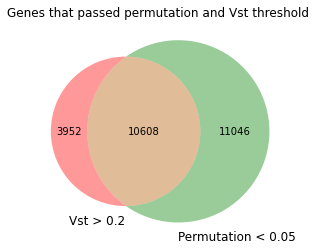

In [47]:
#PERMUTATION RESULTS
inner_per = len(filtering)
left_per = len(boolean.T) - inner_per
right_per = len(filtering_vst.T) -inner_per


venn2(subsets = (left_per, right_per, inner_per), set_labels = ('Vst > 0.2', 'Permutation < 0.05'))
plt.title('Genes that passed permutation and Vst threshold ')
plt.savefig('../plots/venn_diagram_rnaseq.png', transparent=True)

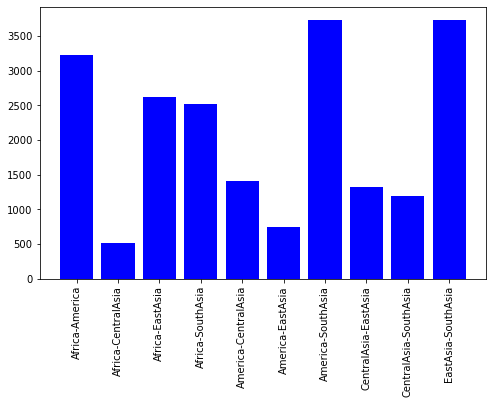

In [49]:
dist = filtering.sum()


fig = plt.figure(figsize = (8, 5))


#fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(dist.index, dist, color ='blue')
 
#plt.xlabel("Pairwise combination")
#plt.ylabel("# of CNVs passed perrmutation")
#plt.title("CNVs that passed Vst(pair-group) and permutation", size=20)
plt.xticks(rotation=90)
plt.savefig('../plots/distribution_candidates_vst_rnaseq.png', transparent=True)
plt.show()


In [67]:
candidates = passed_permut.loc[filtering.index]
candidates

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
9,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.227409,0.000000,0.000000,0.000000
32,0.268473,0.0,0.267888,0.268252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
34,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.387513,0.000000,0.000000,0.000000
36,0.369943,0.0,0.247175,0.000000,0.377968,0.000000,0.000000,0.000000,0.000000,0.000000
48,0.000000,0.0,0.000000,0.000000,0.000000,0.334416,0.000000,0.450893,0.400526,0.000000
...,...,...,...,...,...,...,...,...,...,...
57990,0.000000,0.0,0.000000,0.251082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
57993,0.000000,0.0,0.000000,0.582665,0.000000,0.000000,0.425170,0.000000,0.614767,0.486977
57994,0.228695,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
57997,0.000000,0.0,0.000000,0.207436,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [68]:
candidates = genes.merge(candidates, left_index=True, right_index=True)
candidates = candidates.set_index('Description')
candidates

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
Description,,,,,,,,,,
AL627309.1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.227409,0.000000,0.000000,0.000000
MTND1P23,0.268473,0.0,0.267888,0.268252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MTCO1P12,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.387513,0.000000,0.000000,0.000000
MTCO2P12,0.369943,0.0,0.247175,0.000000,0.377968,0.000000,0.000000,0.000000,0.000000,0.000000
AL669831.4,0.000000,0.0,0.000000,0.000000,0.000000,0.334416,0.000000,0.450893,0.400526,0.000000
...,...,...,...,...,...,...,...,...,...,...
MT-TS1,0.000000,0.0,0.000000,0.251082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MT-TK,0.000000,0.0,0.000000,0.582665,0.000000,0.000000,0.425170,0.000000,0.614767,0.486977
MT-ATP8,0.228695,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [71]:
overlaping = candidates.merge(d, left_index=True, right_index=True)
overlaping.sort_values(by=['Africa-America']).head()
overlaping_mean = overlaping.mean()
overlaping_mean#[['Africa-America']]

Africa-America                    9.170537e-02
Africa-CentralAsia                1.966472e-02
Africa-EastAsia                   5.913077e-02
Africa-SouthAsia                  4.621031e-02
America-CentralAsia               8.924437e-02
America-EastAsia                  2.719371e-02
America-SouthAsia                 1.583316e-01
CentralAsia-EastAsia              1.049104e-01
CentralAsia-SouthAsia             7.891600e-02
EastAsia-SouthAsia                1.610980e-01
start                             8.939658e+07
end                               8.940796e+07
WestEurasia.SouthAsia             2.960122e-03
WestEurasia.Africa                6.550085e-02
WestEurasia.CentralAsiaSiberia    1.234634e-02
WestEurasia.Oceania               5.391256e-02
WestEurasia.America               3.913854e-02
WestEurasia.EastAsia              4.292463e-02
SouthAsia.Africa                  6.351232e-02
SouthAsia.CentralAsiaSiberia      1.258988e-02
SouthAsia.Oceania                 4.276512e-02
SouthAsia.Ame

In [70]:
sns.heatmap(overlaping)


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [87]:
import scipy
#r, p = scipy.stats.pearsonr(overlaping[['Africa-America']], overlaping[['Africa.America']])
scipy.stats.spearmanr(overlaping[['Africa-America']], overlaping[['Africa.America']]).correlation 

0.12432358905404842

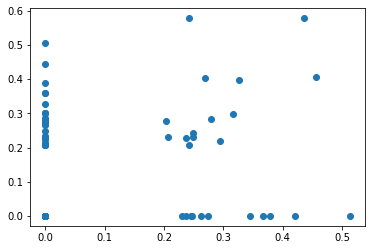

In [73]:
plt.scatter(overlaping[['Africa-America']], overlaping[['Africa.America']])
plt.show()

Text(0, 0.5, 'CNV Vst')

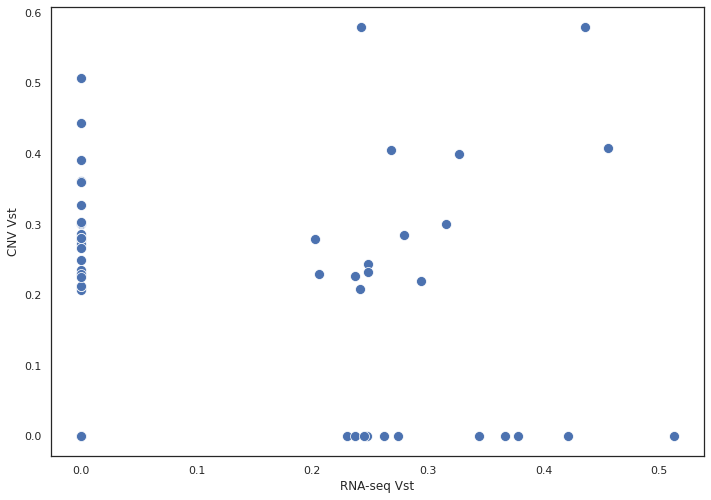

In [86]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.set_style("white")

g=sns.scatterplot(x="Africa-America", y="Africa.America", s=100,
              data=overlaping,
              legend="brief");

plt.xlabel('RNA-seq Vst')
plt.ylabel('CNV Vst')

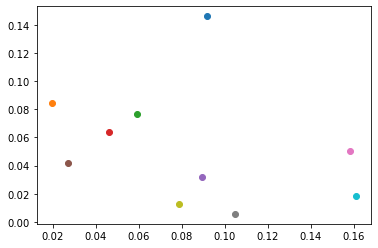

In [74]:
plt.scatter(overlaping_mean[['Africa-America']], overlaping_mean[['Africa.America']])
plt.scatter(overlaping_mean[['Africa-CentralAsia']], overlaping_mean[['Africa.CentralAsiaSiberia']])
plt.scatter(overlaping_mean[['Africa-EastAsia']], overlaping_mean[['Africa.EastAsia']])
plt.scatter(overlaping_mean[['Africa-SouthAsia']], overlaping_mean[['SouthAsia.Africa']])
plt.scatter(overlaping_mean[['America-CentralAsia']], overlaping_mean[['CentralAsiaSiberia.America']])
plt.scatter(overlaping_mean[['America-EastAsia']], overlaping_mean[['America.EastAsia']])
plt.scatter(overlaping_mean[['America-SouthAsia']], overlaping_mean[['SouthAsia.America']])
plt.scatter(overlaping_mean[['CentralAsia-EastAsia']], overlaping_mean[['CentralAsiaSiberia.EastAsia']])
plt.scatter(overlaping_mean[['CentralAsia-SouthAsia']], overlaping_mean[['SouthAsia.CentralAsiaSiberia']])
plt.scatter(overlaping_mean[['EastAsia-SouthAsia']], overlaping_mean[['SouthAsia.EastAsia']])


plt.show()

In [75]:
#means_groupping
cnv_mean = pd.DataFrame(overlaping_mean[18:33])
cnv_mean = cnv_mean.drop('SouthAsia.Oceania')
cnv_mean = cnv_mean.drop('Africa.Oceania')
cnv_mean = cnv_mean.drop('CentralAsiaSiberia.Oceania')
cnv_mean = cnv_mean.drop('Oceania.America')
cnv_mean = cnv_mean.drop('Oceania.EastAsia')

cnv_mean = cnv_mean.rename(index={
    'Africa.America': "Africa-America",
    'Africa.CentralAsiaSiberia': "Africa-CentralAsia",
    'Africa.EastAsia': "Africa-EastAsia",
    'America.EastAsia': "America-EastAsia",
    'CentralAsiaSiberia.EastAsia': "CentralAsia-EastAsia",
    'CentralAsiaSiberia.America': "America-CentralAsia", 
    'SouthAsia.Africa': "Africa-SouthAsia", 
    'SouthAsia.America': "America-SouthAsia",
    'SouthAsia.CentralAsiaSiberia': "CentralAsia-SouthAsia",
    'SouthAsia.EastAsia': "EastAsia-SouthAsia"

})
cnv_mean.sort_index()

,0
Africa-America,0.146007
Africa-CentralAsia,0.084386
Africa-EastAsia,0.076685
Africa-SouthAsia,0.063512
America-CentralAsia,0.032231
America-EastAsia,0.041707
America-SouthAsia,0.050305
CentralAsia-EastAsia,0.005688
CentralAsia-SouthAsia,0.012590
EastAsia-SouthAsia,0.018289


In [76]:
#means_groupping
rnaseq_mean = pd.DataFrame(overlaping_mean[0:10])


In [77]:
means = rnaseq_mean.merge(cnv_mean, left_index=True, right_index=True)
means = means.reset_index()
means = means.rename(columns={'index':'group','0_x':'rnaseq', '0_y':'cnv'})
means

,group,rnaseq,cnv
0,Africa-America,0.091705,0.146007
1,Africa-CentralAsia,0.019665,0.084386
2,Africa-EastAsia,0.059131,0.076685
3,Africa-SouthAsia,0.046210,0.063512
4,America-CentralAsia,0.089244,0.032231
5,America-EastAsia,0.027194,0.041707
6,America-SouthAsia,0.158332,0.050305
7,CentralAsia-EastAsia,0.104910,0.005688
8,CentralAsia-SouthAsia,0.078916,0.012590
9,EastAsia-SouthAsia,0.161098,0.018289


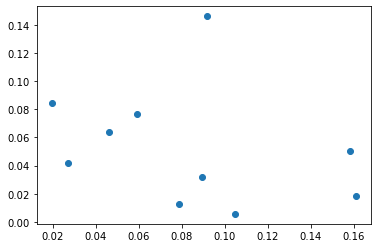

In [78]:
plt.scatter(means['rnaseq'], means['cnv'])
plt.show()

In [80]:
scipy.stats.spearmanr(means['rnaseq'], means['cnv']).correlation 

-0.41818181818181815

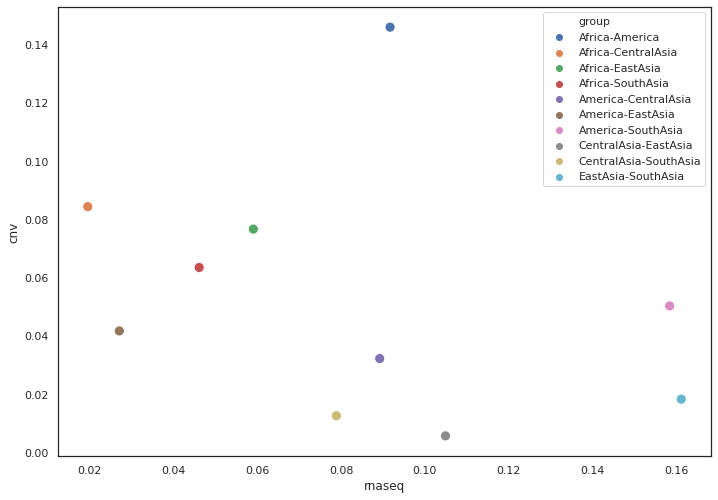

In [81]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.set_style("white")

g=sns.scatterplot(x="rnaseq", y="cnv", s=100,
              hue="group",
              data=means,
              legend="brief");
#g.set(xscale="log");